In [1]:
from CF.cf_recommender_item import cf_recommender_item
from utils.evaluator.evaluator import evaluator
from utils.submission_helper import submission_helper
from utils.data_manager.data_manager import data_manager
from utils.data_manager.splitter import splitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
training, validation, test = splitter().get_train_evaluation_test(percentage_of_training_data=0.6,
                                                                  percentage_of_validation_data=0.2)

In [3]:
k = [60, 100, 250, 400]
similarities = ['pearson', 'cosine', 'adjusted', 'asymmetric', 'jaccard', 'tanimoto',
                             'dice', 'tversky']
map_vectors = []
for chosen_k in k:
    map_vector = []
    for chosen_similarity in similarities:
        recommender_ = cf_recommender_item()
        recommender_.fit(training, k=chosen_k, normalize=True, similarity=chosen_similarity)
        map_vector.append(evaluator.evaluate_already_trained(recommender=recommender_)[2])
    map_vectors.append(map_vector)
index = 0
for vector in map_vectors:
    print("k: ", k[index], "map: ", vector, "similarities: ", similarities)
    index+=1

Similarity column 25975 ( 100 % ), 3661.05 column/sec, elapsed time 0.12 min
Similarity column 25975 ( 100 % ), 3233.23 column/sec, elapsed time 0.13 min
Similarity column 25975 ( 100 % ), 3668.13 column/sec, elapsed time 0.12 min
Similarity column 25975 ( 100 % ), 3373.05 column/sec, elapsed time 0.13 min
Similarity column 25975 ( 100 % ), 2199.27 column/sec, elapsed time 0.20 min
Similarity column 25975 ( 100 % ), 2542.24 column/sec, elapsed time 0.17 min
Similarity column 25975 ( 100 % ), 3127.73 column/sec, elapsed time 0.14 min
Similarity column 25975 ( 100 % ), 1915.75 column/sec, elapsed time 0.23 min
Similarity column 25975 ( 100 % ), 2812.76 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2750.76 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 3258.09 column/sec, elapsed time 0.13 min
Similarity column 25975 ( 100 % ), 2819.64 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2544.39 column/sec, elapsed time 0.17 min

Similarity column 25975 ( 100 % ), 3190.41 column/sec, elapsed time 0.14 min
Similarity column 25975 ( 100 % ), 2916.78 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2828.00 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2728.80 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2820.01 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2801.40 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2298.85 column/sec, elapsed time 0.19 min
Similarity column 25975 ( 100 % ), 2886.26 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2633.45 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2745.43 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2691.06 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2639.70 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2358.95 column/sec, elapsed time 0.18 min

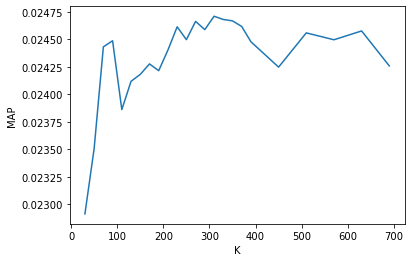

In [4]:
k_tested = [i for i in range(30,400,20)]
k1 = [i for i in range(450, 700, 60)]
k_tested = k_tested + k1
map_=[]
for k in k_tested:
    recommender_k = cf_recommender_item()
    recommender_k.fit(training, k=k, normalize=True, similarity='asymmetric')
    map_.append(evaluator.evaluate_already_trained(recommender=recommender_k)[2])
plt.plot(k_tested, map_)
plt.ylabel('MAP')
plt.xlabel('K')
plt.show()

In [5]:
k = k_tested[np.argmax(map_)]
k

310

Similarity column 25975 ( 100 % ), 2972.95 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2793.55 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2903.92 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2872.57 column/sec, elapsed time 0.15 min
Similarity column 25975 ( 100 % ), 2630.36 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2100.18 column/sec, elapsed time 0.21 min
Similarity column 25975 ( 100 % ), 2481.81 column/sec, elapsed time 0.17 min
Similarity column 25975 ( 100 % ), 2273.65 column/sec, elapsed time 0.19 min
Similarity column 25975 ( 100 % ), 2459.60 column/sec, elapsed time 0.18 min
Similarity column 25975 ( 100 % ), 2634.55 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2645.53 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2461.92 column/sec, elapsed time 0.18 min
Similarity column 25975 ( 100 % ), 2688.48 column/sec, elapsed time 0.16 min

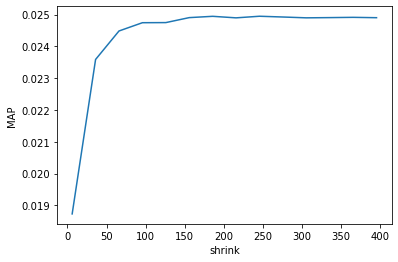

In [6]:
shrinks = [i for i in range(6,400, 30)]
map_=[]
for s in shrinks:
    recommender_shrink = cf_recommender_item()
    recommender_shrink.fit(training, k=310, shrink=s, normalize=True, similarity='asymmetric')
    map_.append(evaluator.evaluate_already_trained(recommender=recommender_shrink)[2])
plt.plot(shrinks, map_)
plt.ylabel('MAP')
plt.xlabel('shrink')
plt.show()

In [7]:
shrink = shrinks[np.argmax(map_)]
shrink


246

Similarity column 25975 ( 100 % ), 3083.83 column/sec, elapsed time 0.14 min
Similarity column 25975 ( 100 % ), 2580.17 column/sec, elapsed time 0.17 min
Similarity column 25975 ( 100 % ), 2154.83 column/sec, elapsed time 0.20 min
Similarity column 25975 ( 100 % ), 2634.43 column/sec, elapsed time 0.16 min
Similarity column 25975 ( 100 % ), 2094.09 column/sec, elapsed time 0.21 min
Similarity column 25975 ( 100 % ), 2535.20 column/sec, elapsed time 0.17 min
Similarity column 25975 ( 100 % ), 2577.48 column/sec, elapsed time 0.17 min
Similarity column 25975 ( 100 % ), 2624.92 column/sec, elapsed time 0.16 min


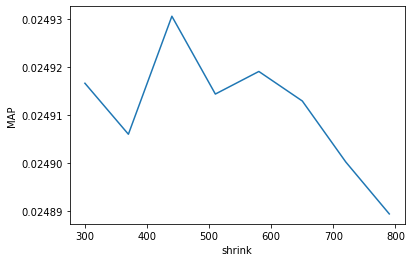

In [8]:
shrinks = [i for i in range(300,800, 70)]
map_=[]
for s in shrinks:
    recommender_shrink = cf_recommender_item()
    recommender_shrink.fit(training, k=310, shrink=s, normalize=True, similarity='asymmetric')
    map_.append(evaluator.evaluate_already_trained(recommender=recommender_shrink)[2])
plt.plot(shrinks, map_)
plt.ylabel('MAP')
plt.xlabel('shrink')
plt.show()


In [9]:
rec = cf_recommender_item()
rec.fit(training_set=data_manager().get_urm(), k=310, shrink=246, similarity='asymmetric')
s = submission_helper(name_of_the_file='cf_item_first', recommender=rec)
s.build_submission()

Similarity column 25975 ( 100 % ), 2510.54 column/sec, elapsed time 0.17 min
